<a href="https://colab.research.google.com/github/rthakkar420/simfin-tutorials/blob/master/Warren_Buffett's_Competitive_advantage_ratios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt


In [ ]:
company = 'AAPL'
key = '85af93b86d5a3f1841c65a7b7b368d34'
income_statement = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{company}?apikey={key}').json()
key_metrics = requests.get(f'https://financialmodelingprep.com/api/v3/key-metrics/{company}?apikey={key}').json()
balance_sheet = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?apikey={key}').json()
cash_flow = requests.get(f'https://financialmodelingprep.com/api/v3/cash-flow-statement/{company}?apikey={key}').json()
financial_growth = requests.get(f'https://financialmodelingprep.com/api/v3/financial-growth/{company}?apikey={key}').json()
rating = requests.get(f'https://financialmodelingprep.com/api/v3/rating/{company}?apikey={key}').json()
historical_rating = requests.get(f'https://financialmodelingprep.com/api/v3/historical-rating/{company}?apikey={key}').json()
dcf = requests.get(f'https://financialmodelingprep.com/api/v3/discounted-cash-flow/{company}?apikey={key}').json()
daily_dcf = requests.get(f'https://financialmodelingprep.com/api/v3/historical-daily-discounted-cash-flow/{company}?apikey={key}').json()
hist_dcf = requests.get(f'https://financialmodelingprep.com/api/v3/historical-discounted-cash-flow/{company}?apikey={key}').json()
mkt_cap = requests.get(f'https://financialmodelingprep.com/api/v3/market-capitalization/{company}?apikey={key}').json()
hist_mkt_cap = requests.get(f'https://financialmodelingprep.com/api/v3/historical-market-capitalization/{company}?apikey={key}').json()


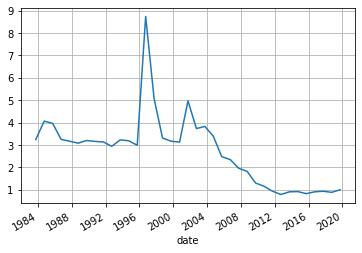

In [ ]:
df_income = pd.read_json(json.dumps(income_statement)).set_index('date')
df_cashflow = pd.read_json(json.dumps(cash_flow)).set_index('date')
SGA = df_income['generalAndAdministrativeExpenses']
GrossProfit = df_income['grossProfit']
SGAoverGrossProfit=SGA/GrossProfit
SGAoverGrossProfit=SGAoverGrossProfit/SGAoverGrossProfit[0]
SGAoverGrossProfit.plot(grid=True)

#If this is decreasing, it means that the company has to spend less in order to compete



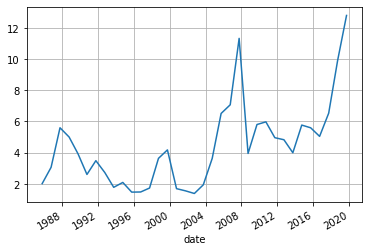

In [ ]:
df_key_metrics = pd.read_json(json.dumps(key_metrics)).set_index('date')
price_to_book=df_key_metrics['pbRatio']
price_to_book.plot(grid=True)
#if this is higher, it means that the company may be trading at an overvaluation

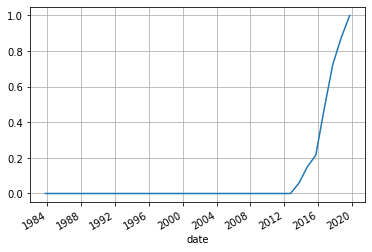

In [ ]:
interest_over_grossprofit = df_income['interestExpense']/df_income['grossProfit']
interest_over_grossprofit=interest_over_grossprofit/interest_over_grossprofit[0]
interest_over_grossprofit.plot(grid=True)
#Too much interest per $ of gross profit may be a sign that the company requires too much debt financing

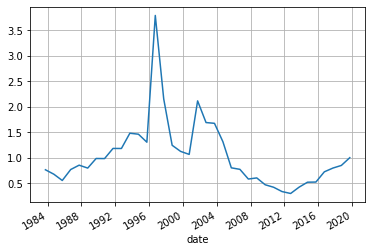

In [ ]:
randd_over_gp = df_income['researchAndDevelopmentExpenses']/df_income['grossProfit']
randd_over_gp = randd_over_gp/randd_over_gp[0]
randd_over_gp.plot(grid=True)
#too much R&D expenses signify that the company is in an overcompetitive industry

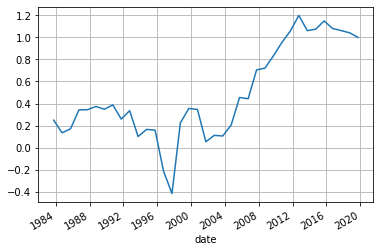

In [ ]:
ebitda_margin = df_income['ebitda']/df_income['revenue']
ebitda_margin = ebitda_margin/ebitda_margin[0]
ebitda_margin.plot(grid=True)
#How much the company takes home per revenue (higher is better in most cases unless the company has a lot of debt or depreciation)

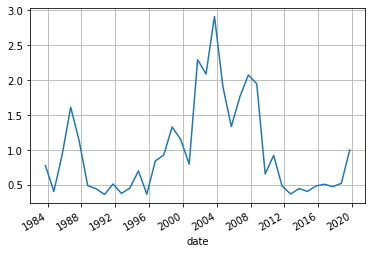

In [ ]:
df_balance = pd.read_json(json.dumps(balance_sheet)).set_index('date')
cash_over_revenue = df_balance['cashAndCashEquivalents']/df_income['revenue']
cash_over_revenue = cash_over_revenue/cash_over_revenue[0]
cash_over_revenue.plot(grid=True)
#growing cash reserves can signify an excess profit, always a good sign

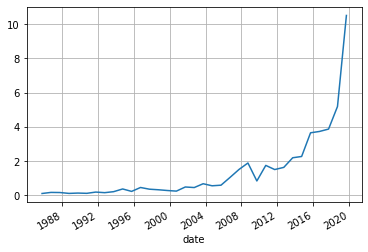

In [ ]:
cash_per_share = df_key_metrics['cashPerShare']
cash_per_share.plot(grid=True)
#increasing cash per share represents more chances of dividends, buybacks, and liquidity

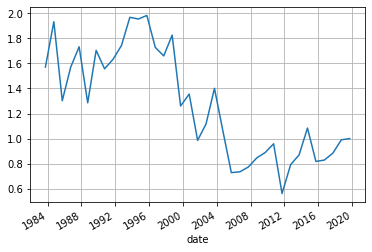

In [ ]:
receivables_over_sales = df_balance['netReceivables']/df_income['revenue']
receivables_over_sales = receivables_over_sales/receivables_over_sales[0]
receivables_over_sales.plot(grid=True)
#If this is lower, it means the company relies less on consumer debt meaning that its sales are more liquid

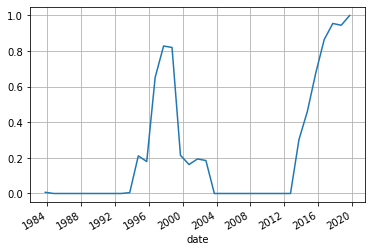

In [ ]:
ltdebt_over_assets = df_balance['longTermDebt']/df_balance['totalAssets']
ltdebt_over_assets = ltdebt_over_assets/ltdebt_over_assets[0]
ltdebt_over_assets.plot(grid=True)
#Having assets financed by long term debt usually isn't a good sign. 

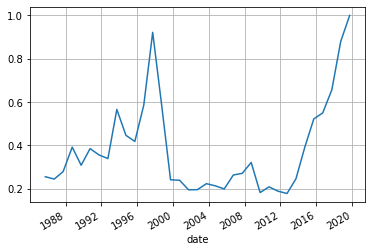

In [ ]:
debt_to_equity = df_key_metrics['debtToEquity']
debt_to_equity = debt_to_equity/debt_to_equity[0]
debt_to_equity.plot(grid=True)
#increasing debt to equity may mean that the company is leveraging in order to take on new projects, but it may also mean that the industry has gotten far more competitive which requires the company to take out debt

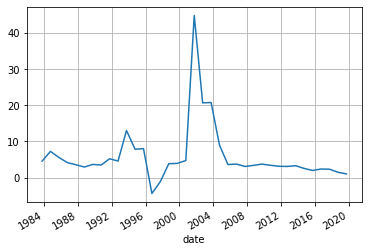

In [ ]:
retained_earnings_to_ebitda = df_balance['retainedEarnings']/df_income['ebitda']
retained_earnings_to_ebitda = retained_earnings_to_ebitda/retained_earnings_to_ebitda[0]
retained_earnings_to_ebitda.plot(grid=True)
#if this increases with ebitda, it's usually a good sign

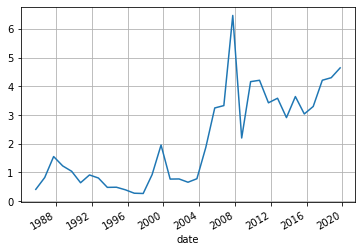

In [ ]:
ev_to_sales = df_key_metrics['evToSales']
ev_to_sales.plot(grid=True)
#valuation ratio that uses revenue as common denominator

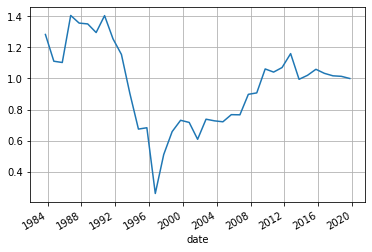

In [ ]:
net_profit_margin = df_income['grossProfit']/df_income['revenue']
net_profit_margin=net_profit_margin/net_profit_margin[0]
net_profit_margin.plot(grid=True)

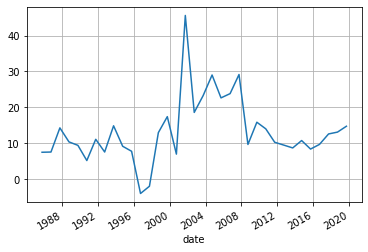

In [ ]:
ev_to_ebitda = df_key_metrics['enterpriseValueOverEBITDA']
ev_to_ebitda.plot(grid=True)
#valuation multiple using cashflows as the common denominator

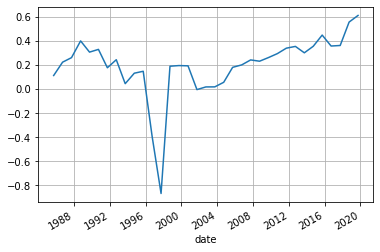

In [ ]:
roe = df_key_metrics['roe']
roe.plot(grid=True)
#productivity*profitability*leverage (check leverage and net profit margin before relying solely on this)

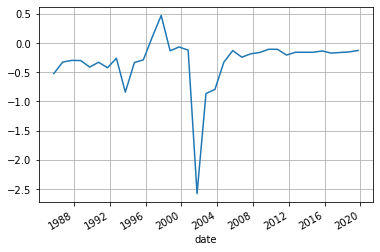

In [ ]:
capex_to_netearnings = df_cashflow['capitalExpenditure']/df_income['ebitda']
capex_to_netearnings.plot(grid=True)
#decreasing capex is usually better, compare to others in same industry for more accuracy

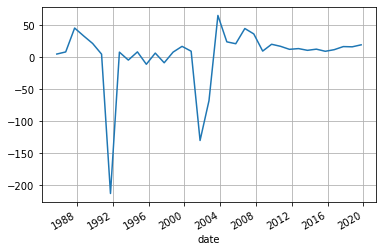

In [ ]:
price_to_fcf = df_key_metrics['pfcfRatio']
price_to_fcf.plot(grid=True)
#price to free cashflow tells you how much cash is available to an investor per share

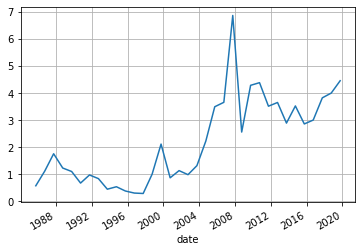

In [ ]:
price_to_sales = df_key_metrics['priceToSalesRatio']
price_to_sales.plot(grid=True)
#valuation metric, you are usually better off buying at a lower P/S but make sure you look at the scale of the sales

In [ ]:
df_daily_dcf = pd.read_json(json.dumps(daily_dcf)).set_index('date')

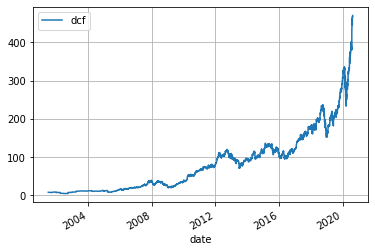

In [ ]:
df_daily_dcf.plot(grid=True)
#daily updated DCF value (not sure about the accuracy here)

In [ ]:
df_dcf = pd.read_json(json.dumps(dcf)).set_index('date')
df_dcf

,symbol,dcf,Stock Price
date,,,
2020-08-20,AAPL,480.356542,469.85


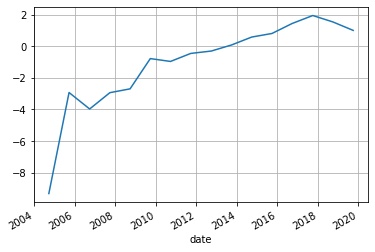

In [ ]:
debt_to_ebitda = df_key_metrics['netDebtToEBITDA']
debt_to_ebitda = debt_to_ebitda/debt_to_ebitda[0]
debt_to_ebitda[:16].plot(grid=True)

In [155]:
depr_to_profit = df_cashflow['depreciationAndAmortization']/df_income['grossProfit']
#if this increases too much then it may mean that the company has to cycle through equipment faster meaning it has too much competition

In [156]:
ltdebt_to_totaldebt = df_balance['longTermDebt']/df_balance['totalDebt']
#important for banks, who should have more long term debt/total, if this increases much for companies, research why

In [159]:
roic = df_key_metrics['roic']
#efficiency of capital usage, ideally should be above 2-3% to be beating WACC
roic

date
2019-09-28    0.282378
2018-09-29    0.291850
2017-09-30    0.233471
2016-09-24    0.252893
2015-09-26    0.345746
2014-09-27    0.317612
2013-09-28    0.307055
2012-09-29    0.405484
2011-09-24    0.386930
2010-09-25    0.340427
2009-09-26    0.335213
2008-09-27    0.270604
2007-09-29    0.312064
2006-09-30    0.262530
2005-09-24    0.224991
2004-09-25    0.071322
2003-09-27    0.020637
2002-09-28    0.018750
2001-09-29   -0.011548
2000-09-30    0.224230
1999-09-25    0.187154
1998-09-25    0.118815
1997-09-26   -0.432712
1996-09-27   -0.385302
1995-09-29    0.172555
1994-09-30    0.148854
1993-09-24    0.052572
1992-09-25    0.305575
1991-09-27    0.219587
1990-09-28    0.399692
1989-09-29    0.402380
1988-09-30    0.522709
1987-09-25    0.410410
1986-09-26    0.373045
1985-09-27    0.187207
Name: roic, dtype: float64